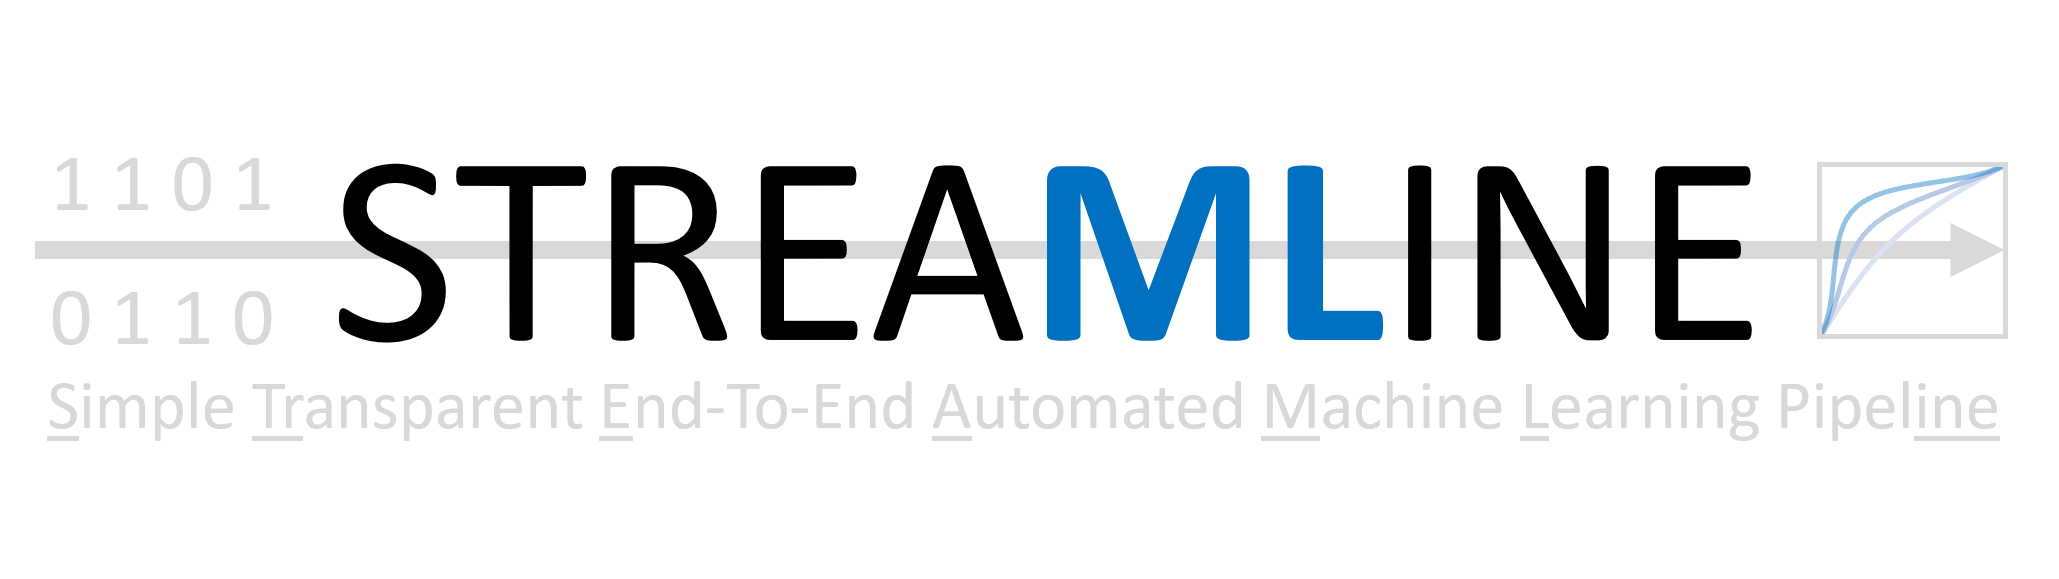

# Summary

This notebook runs all aspects of the STREAMLINEv2 which is an automated machine learning analysis pipeline for binary classification tasks. Of note, two potentially important elements that are not automated by this pipeline include careful data cleaning and feature engineering using problem domain knowledge.

This notebook is an example set up to run 'as-is' on the given 'demo' dataset from the UCI repository (HCC dataset) using only three modeling algorithms (so that it runs in a matter of minutes). We analyze a copy of the dataset with and without covariate features to show how this pipline can be run on multiple datasets simultaneously (having the option to compare modeling on these different datasets in a later phase of the pipeline. Users will need to update pipeline run parameters below to ready the pipeline for their own needs.

## Notebook Housekeeping
Set up notebook cells to display internal process. Comment to hide output.

In [21]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

## STREAMLINE Workflow

### Mandatory Run Parameters for Pipeline

In [22]:
data_path = "/Users/bandheyh/Local/Cedars/UrbsLab/STREAMLINE_Dev/DemoData" 
output_path = '/Users/bandheyh/Local/Cedars/UrbsLab/STREAMLINE_Dev/demo/'
experiment_name = 'hcc_demo'  
class_label = 'Class' 
instance_label = 'InstanceID' 

In [23]:
import os
import shutil
if os.path.exists(output_path):
    shutil.rmtree(output_path)

### Phase 1: Exploratory Analysis

In [24]:
from streamline.dataprep.eda_runner import EDARunner

In [25]:
# EDA Runner Class, non default parameters fed in, rest set to deafaut automatically
# Documentation can be found at ___
eda = EDARunner(data_path, output_path, experiment_name, class_label=class_label, instance_label=instance_label, 
                n_splits=3, random_state=42)

In [26]:
eda.run(False)

INFO:root:Loading Dataset: hcc-data_example
INFO:root:Loading Dataset: demodata
INFO:root:Loading Dataset: hcc-data_example_no_covariates
INFO:root:Loading Dataset: hcc-data_example
INFO:root:Identifying Feature Types...
INFO:root:Running Basic Exploratory Analysis...
INFO:root:Data Counts: ----------------
INFO:root:Instance Count = 165
INFO:root:Feature Count = 49
INFO:root:    Categorical  = 27
INFO:root:    Quantitative = 22
INFO:root:Missing Count = 826
INFO:root:    Missing Percent = 0.10216450216450217
INFO:root:Class Counts: ----------------
INFO:root:Class Count Information0    102
1     63
Name: Class, dtype: int64
INFO:root:Generating Feature Correlation Heatmap...
INFO:root:Loading Dataset: demodata
INFO:root:Identifying Feature Types...
INFO:root:Running Basic Exploratory Analysis...
INFO:root:Data Counts: ----------------
INFO:root:Instance Count = 165
INFO:root:Feature Count = 49
INFO:root:    Categorical  = 27
INFO:root:    Quantitative = 22
INFO:root:Missing Count = 82

### Phase 2: Data Preprocessing

In [27]:
from streamline.dataprep.data_process import DataProcessRunner

In [28]:
dpr = DataProcessRunner(output_path, experiment_name, class_label=class_label, instance_label=instance_label, 
                        random_state=42)

In [29]:
dpr.run(False)

INFO:root:Preparing Train and Test for: hcc-data_example_CV_1
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_CV_0
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_CV_2
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_no_covariates_CV_1
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example_no_covariates Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_no_covariat

In [30]:
del dpr

### Phase 3: Feature Importance Evaluation

In [31]:
from streamline.featurefns.feature_runner import FeatureImportanceRunner

In [32]:
f_imp = FeatureImportanceRunner(output_path, experiment_name, class_label=class_label, instance_label=instance_label,
                                n_splits=10, random_state=42)

In [33]:
f_imp.run(False)

INFO:root:Loading Dataset: hcc-data_example_CV_1_Train
INFO:root:Prepared Train and Test for: hcc-data_example_CV_1
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example CV1 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_CV_0_Train
INFO:root:Prepared Train and Test for: hcc-data_example_CV_0
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example CV0 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_CV_2_Train
INFO:root:Prepared Train and Test for: hcc-data_example_CV_2
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example CV2 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_CV_1_Train
INFO:root:Prepared Train and Test for: hcc-data_example_CV_1
INFO:root:Running

In [34]:
del f_imp

### Run Parameters for Phase 4: Feature Selection

In [35]:
from streamline.featurefns.feature_runner import FeatureSelectionRunner

In [36]:
f_sel = FeatureSelectionRunner(output_path, experiment_name, algorithms=["MI", "MS"],
                               class_label=class_label, instance_label=instance_label, random_state=42)

In [37]:
f_sel.run(False)

INFO:root:Plotting Feature Importance Scores...
INFO:root:                           Feature  Importance
30       Alpha-Fetoprotein (ng/mL)    0.122169
26             Performance Status*    0.121332
40      Alkaline phosphatase (U/L)    0.084168
1                        Symptoms     0.077926
48                Ferritin (ng/mL)    0.069531
44  Major dimension of nodule (cm)    0.068034
31              Haemoglobin (g/dL)    0.060757
23                Age at diagnosis    0.058108
46                            Iron    0.044671
20          Portal Vein Thrombosis    0.039500
INFO:root:Saved Feature Importance Plots at
INFO:root:/Users/bandheyh/Local/Cedars/UrbsLab/STREAMLINE_Dev/demo//hcc_demo/hcc-data_example/feature_selection/mutual_information/TopAverageScores.png
INFO:root:                             Feature  Importance
31                Haemoglobin (g/dL)    0.105463
40        Alkaline phosphatase (U/L)    0.095252
26               Performance Status*    0.080730
47             Oxygen S

In [18]:
del f_sel

### Run Parameters for Phase 5: Modeling

In [19]:
# Algorithm Setup Options
algorihms = []
training_subsample = None
use_uniform_FI = True
primary_metric = 'balanced_accuracy' 

# Hyperparameter Sweep Options
n_trials = 200
timeout = 900
export_hyper_sweep_plots = True

### Custom Hyperparameter Sweep Options for ML Algorithms

### Phase 6:  Statistics Summary and Figure Generation

In [20]:
plots = []
metric_weight = primary_metric
top_model_features = 40

### Phase 10:  Apply Models to Replication Dataset
An optional phase to apply all trained models from previous phases to a separate 'replication' dataset which will be used to evaluate models across all algorithms and CV splits. In this demo, we didn't have a separate replication dataset to use for the UCI HCC dataset evaluated. Thus here we use a copy of the original HCC dataset as a 'pretend' replication dataset to demonstrate functionality. The replication data folder can include 1 or more datasets that can be evaluated as separate replication data. The user also needs to 

### Run Parameters for Phase 11:  File Cleanup
An optional phase to delete all unnecessary/temporary files generated by the pipeline.